#Predict geographical origin of music

##Get the data
The dataset can be obtained at http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music   
Unzip it to PATH_TO_DS_HK_5/ds/data/final_project  
We will be using the file called "default_features_1059_tracks.txt"  

## About the data
The dataset contains attributes of 1059 tracks of ethnic or traditional music.

The 1st 68 attributes (columns) are "audio features" extracted from each song using MARSYAS software.
The remaining 2 columns correspond to the latitude and longitude of the artist(s)' main country/ area of residence.

More info can be found at: http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music

##Audio features extraction with MARSYAS

These audio features have been extracted from each songtrack using MARSYAS.  

MARSYAS(Music Analysis, Retrieval and Synthesis for Audio Signals) is an open source software framework for audio processing with specific emphasis on Music Information Retrieval applications.

###Installation of MARSYAS

On Linux, MARSYAS needs to be built from source. Get the source from https://github.com/marsyas/marsyas/archive/release/0.5.zip and follow the build instructions at http://marsyas.info/doc/manual/marsyas-user/Building-latest-Marsyas-on-Debian_002fUbuntu.html#Building-latest-Marsyas-on-Debian_002fUbuntu 

Note: if you get an error related to "Qt" while running "cmake" from within your vagrant VM. Re-run using the following option: 
`cmake .. -DWITH_QT=OFF`


###Audio features
####General definitions

<img src="music_analysis.png" witdh="500px" height="500px">   
 

 - Features: measurable properties of the input signal.  
 
 - Feature extraction: the  input raw signal is transformed into a smaller set of variables to simplify analysis.  
 
 - Timbre: tonal qualities that define a particular sound/source. It can refer to, e.g., class (e.g. violin or piano), or quality (e.g. bright, rough).  Timbre is an attribute that allows us to differentiate sounds of the same pitch, loudness, duration and spatial location.
 

####About audio features of our dataset
"The information or features extracted from each tracks of the dataset are timbral features. Each of these is an indicator of timbre, which is one of the main ways to distinguish instruments. Since instrumentation is also a major difference between cultural music traditions, these are appropriate to the task. No feature weighting or pre-ﬁltering was applied."

All features values have been normalized: std=1 and mean=0

The extracted 68 audio features are of the following types:

####Time Zero Crossings
Zero-crossing rate (ZCR) is a weighted measure of the number of times the signal changes sign in a frame. It is high for noisy (unvoiced) sounds and low for tonal (voiced) sounds.

####Spectral Centroid
The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the "center of mass" of the spectrum is. Perceptually, it is usually associated with the sound’s “brightness”.  

####Spectral Flux
Spectral flux is a measure of how quickly the power spectrum of a signal is changing.

####Spectral Rolloff
The spectral rolloff point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies.
It is another measure of spectral shape.

####Mel-Frequency Cepstral Coefficients (MFCC)
Mel Frequency Cepstral Coefficents (MFCCs) are a feature widely used in automatic speech and speaker recognition due to their ability to compactly represent the audio spectrum .

##Preliminaries

In [63]:
import sys
import sklearn
print pd.__name__, pd.__version__
print np.__name__, np.__version__
print mpl.__name__, mpl.__version__
print sns.__name__, sns.__version__
print sklearn.__name__, sklearn.__version__
print sys.version

pandas 0.16.0
numpy 1.9.2
matplotlib 1.4.3
seaborn 0.5.1
sklearn 0.16.1
2.7.6 (default, Mar 22 2014, 22:59:56) 
[GCC 4.8.2]


In [3]:
%matplotlib inline
#TODO: clean imports
from __future__ import unicode_literals, division

import IPython
import warnings
import requests
import matplotlib as mpl


from pylab import *

from IPython.display import HTML
from IPython.display import display as prnt

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn import metrics
from sklearn import preprocessing

pd.set_option('display.precision',4)
pd.set_option('display.float_format', lambda x: '%.2f' %x)



# Notebook Options
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

### Utility function

In [4]:
def table(df,replace_match="",replace_str=""):
    return IPython.display.display(HTML(df.to_html().replace('<table border="1" class="dataframe">','<table class="table table-striped table-hover">').replace(replace_match,replace_str)))

## 1st look at the data set

In [3]:
#let's load the data set
df = pd.read_csv('../data/final_project/default_features_1059_tracks.txt', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 70 columns):
0     1059 non-null float64
1     1059 non-null float64
2     1059 non-null float64
3     1059 non-null float64
4     1059 non-null float64
5     1059 non-null float64
6     1059 non-null float64
7     1059 non-null float64
8     1059 non-null float64
9     1059 non-null float64
10    1059 non-null float64
11    1059 non-null float64
12    1059 non-null float64
13    1059 non-null float64
14    1059 non-null float64
15    1059 non-null float64
16    1059 non-null float64
17    1059 non-null float64
18    1059 non-null float64
19    1059 non-null float64
20    1059 non-null float64
21    1059 non-null float64
22    1059 non-null float64
23    1059 non-null float64
24    1059 non-null float64
25    1059 non-null float64
26    1059 non-null float64
27    1059 non-null float64
28    1059 non-null float64
29    1059 non-null float64
30    1059 non-null float64
31    1059 non-null float

Data types are ok, no missing data

In [4]:
table(df.head())

In [5]:
#rename columns
labels = range(0,68)
labels.extend(['lat','lon'])

df.columns= labels 


In [6]:
#random sample of rows
from random import sample

df.ix[sample(df.index,10)]

0     1     2     3     4     5     6     7     8     9  ...      60  \
312 -0.08 -0.28 -0.66 -0.89 -0.15  0.10 -0.68 -0.66 -0.79 -1.17  ...   -0.38   
615  1.36  1.61 -0.08 -0.83 -0.67 -2.10 -3.15 -2.19 -1.79 -1.65  ...   -0.26   
694  0.31  0.19 -0.46  0.09 -0.07  0.09 -0.61  0.42 -0.34  0.21  ...    0.15   
221 -0.05 -0.41 -0.18 -0.33 -0.31 -0.74  0.52  0.25  0.98  0.23  ...   -0.88   
170  0.07  0.25  1.14  0.62  0.97 -1.27  0.57 -0.23  0.41  0.18  ...   -0.53   
271 -0.53 -0.66 -0.53 -0.35  0.15  0.90  0.65 -0.20 -0.66  1.61  ...    0.69   
813  0.52  0.12  0.00  2.21 -0.67 -0.67  0.54  0.22  0.98  0.82  ...    0.21   
920  6.08  5.27  4.45  0.01 -0.39  1.70 -0.50  0.46  0.74 -0.04  ...   -0.13   
897 -0.59 -0.67 -0.43  0.80  0.83  0.12 -0.13  3.13 -1.21  0.79  ...   -0.03   
841 -0.56 -0.75 -0.20 -0.04 -0.61  0.67  0.74  1.11  1.38  0.34  ...    0.66   

       61    62    63    64    65    66    67   lat    lon  
312  1.08  0.07  0.58  1.23  0.02 -0.42  0.65 23.76 121.00  
615  2.00  1.05  1.63  1.09  1.49  1.67  1.93 39.91 116.38  
694  1.15  0.14 -0.53  0.09 -0.08 -0.22  0.19 36.70   3.21  
221 -0.93 -1.47 -0.78  0.01 -0.56 -0.62 -0.61 28.61  77.20  
170 -0.88 -0.26 -0.80 -0.87 -0.85 -0.69 -0.73 36.70   3.21  
271  1.08  0.02  0.65  0.64  0.67  1.43  1.30 52.50  -0.12  
813  0.02  0.22 -0.22 -0.69 -0.12 -0.41  0.07 39.91  32.83  
920 -1.31 -1.22 -0.54 -0.71 -0.55 -0.75 -0.23 41.90  12.48  
897  0.45 -0.08 -0.72 -0.15  0.71 -0.33 -0.35  9.03  38.74  
841  1.01  2.43 -0.13  0.13 -0.29  0.18 -0.69 12.65  -8.00  

[10 rows x 70 columns]

##EDA

###Univariate

In [7]:
table(df.describe())

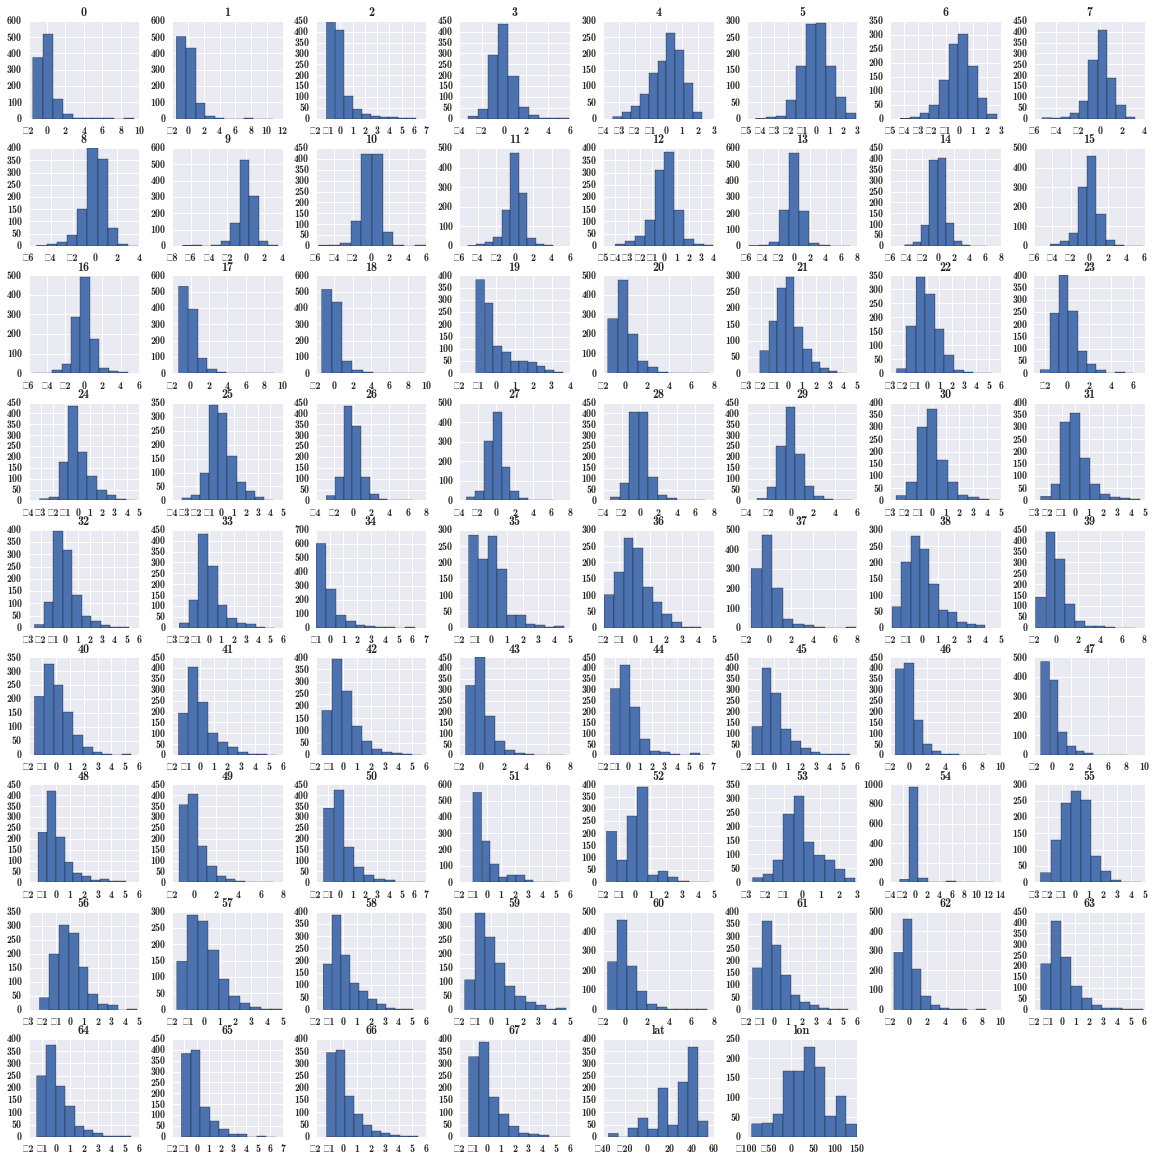

In [8]:
import seaborn as sns


df.hist( figsize=(20, 20));

###Multivariate

A quick look at relationships of 1st features using lat and lon as hue

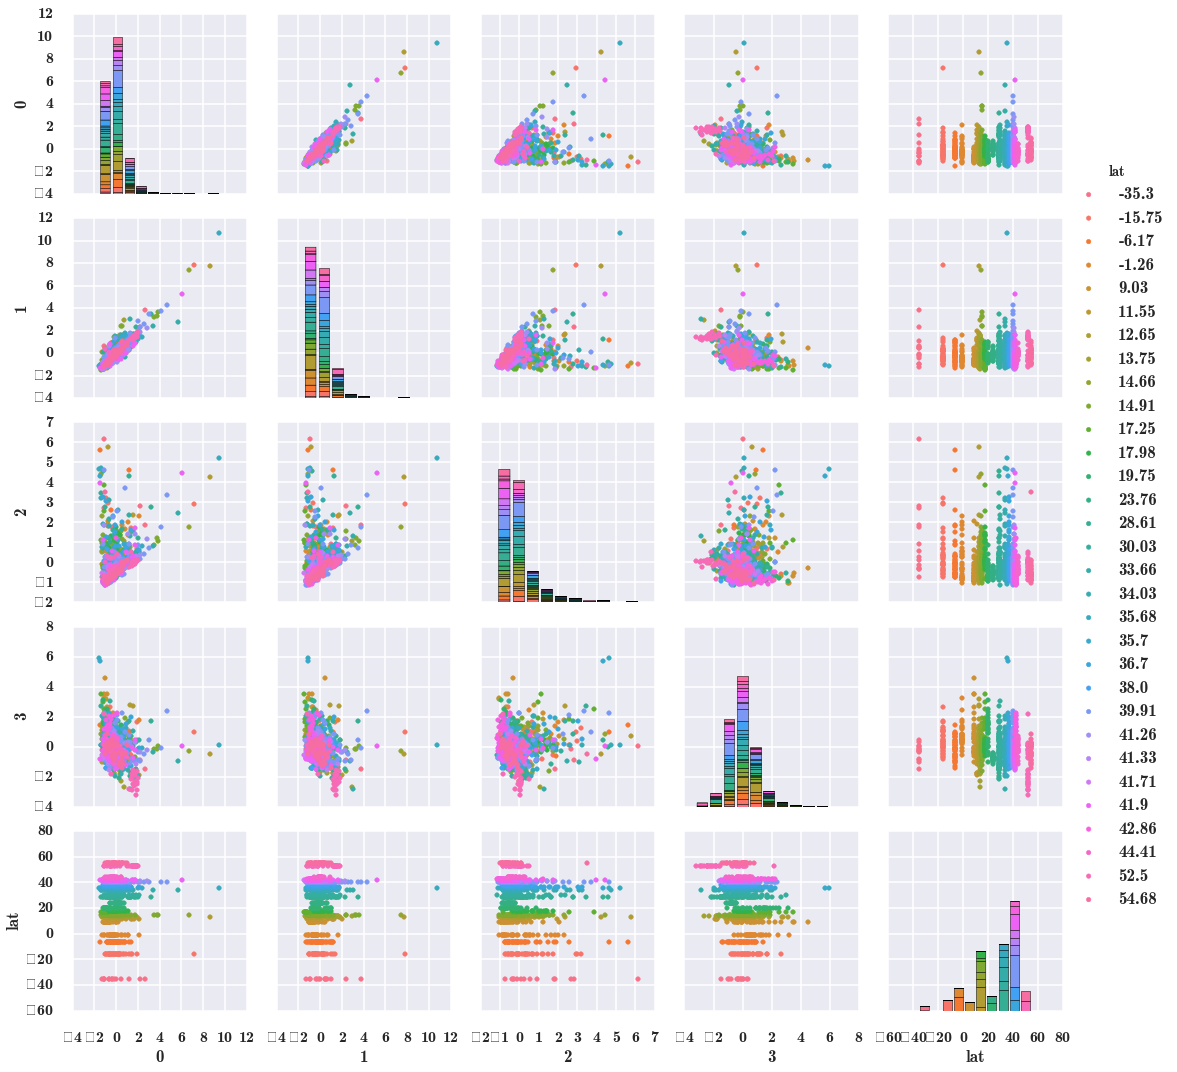

In [23]:
with sns.plotting_context("poster", font_scale=1, rc=c):
    g = sns.PairGrid(df[[0,1,2,3,'lat']], hue="lat")
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)
    g.add_legend()

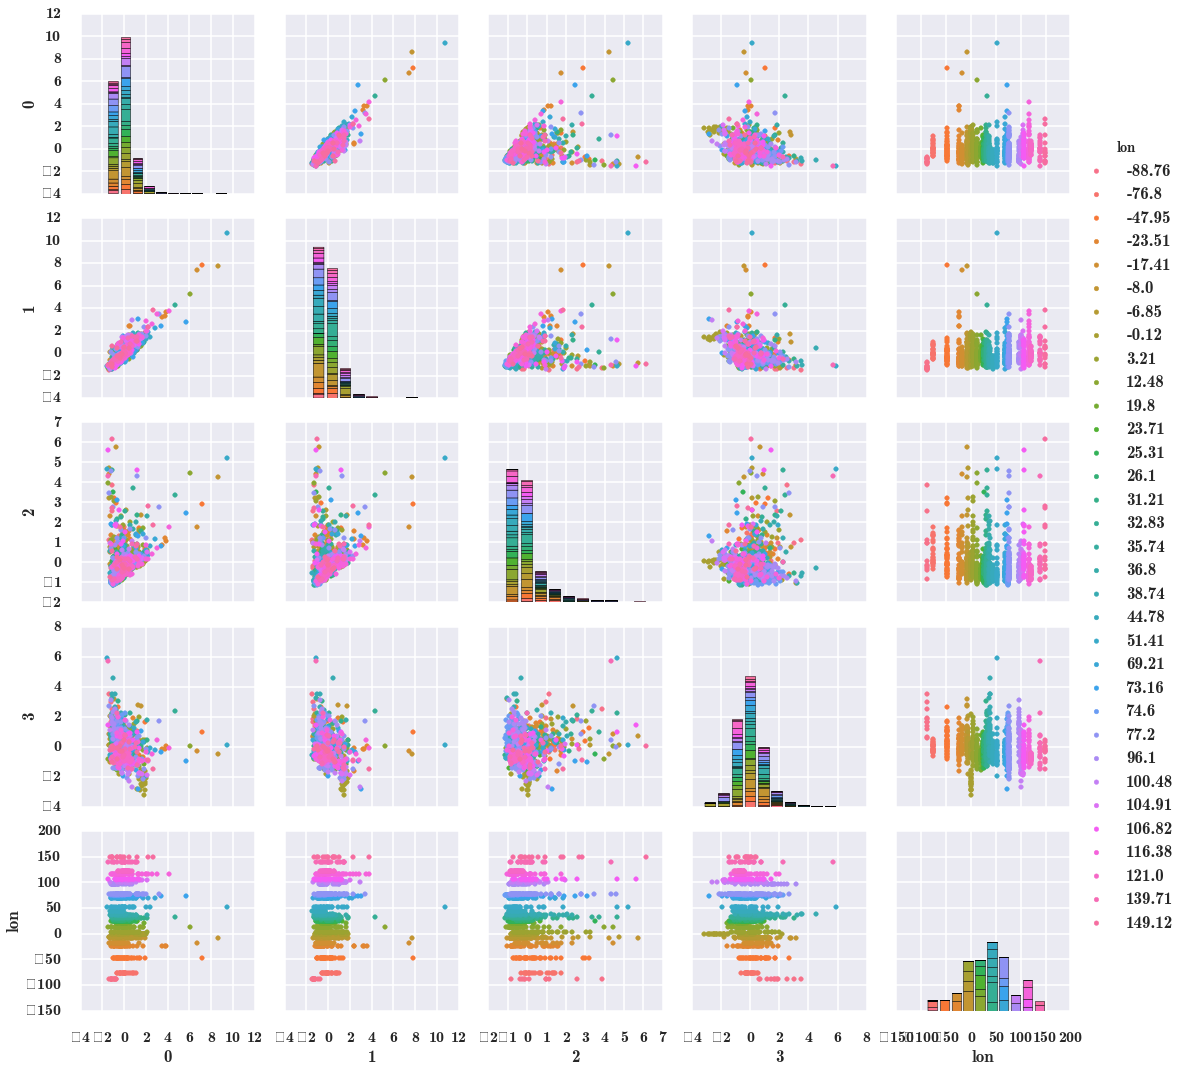

In [24]:
with sns.plotting_context("poster", font_scale=1, rc=c):
    g = sns.PairGrid(df[[0,1,2,3,'lon']], hue="lon")
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)
    g.add_legend()

####Correlation plot

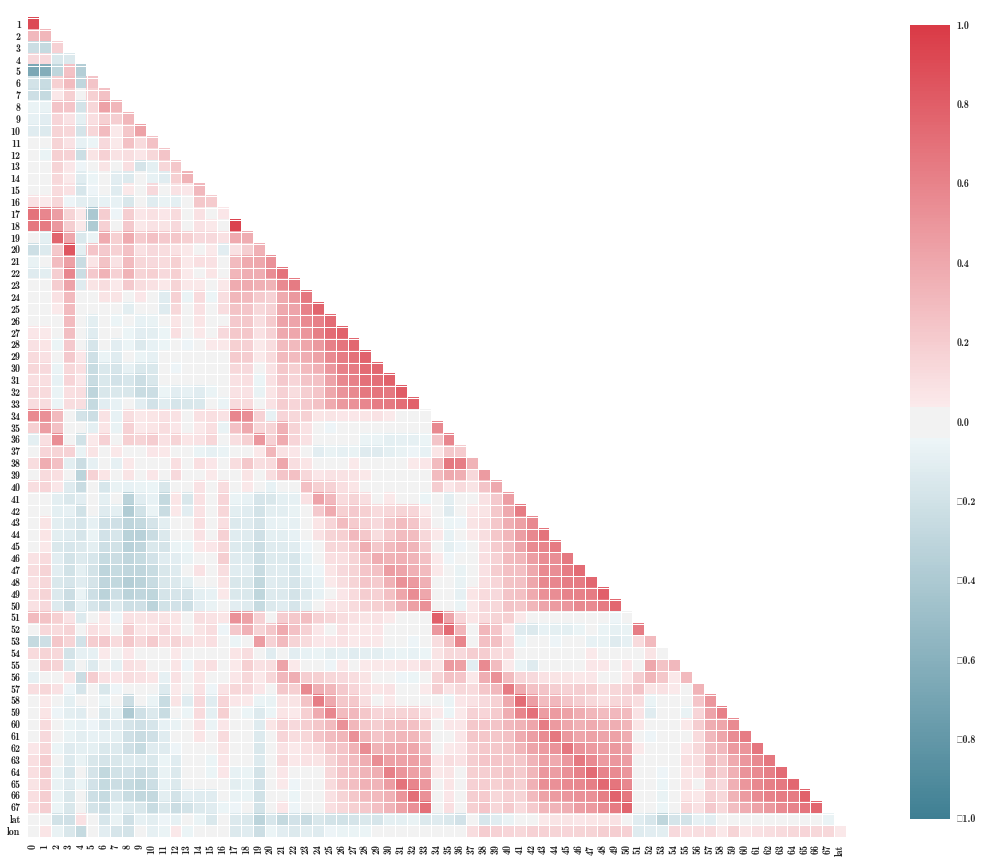

In [22]:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(df, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

We can notice that the 1st 13 audio features are not correlated with each other but that some others seem strongly correlated between each other: one explanation could be that they are calculated using same raw signal data or signal processing techniques 

###Latitudes and longitudes

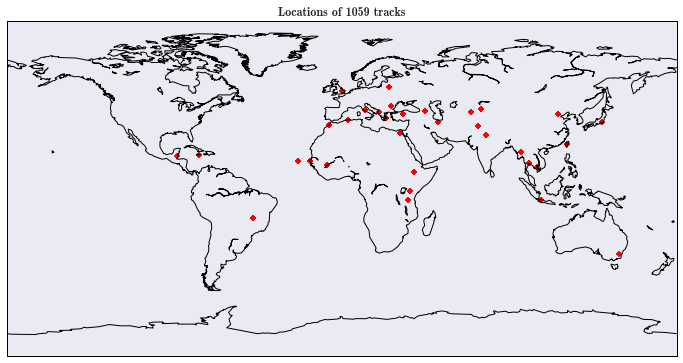

In [26]:
#let's try to plot our latitudes and longitudes on a map to visualize where the tracks are coming from
import numpy as np
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from datetime import datetime



lons = [ i for i in df.iloc[:,-1]]
lats = [ j for j in df.iloc[:,-2]]
plt.figure(figsize=(12,6))
map = Basemap(lat_0=0, lon_0=0)



# plot coastlines.
map.drawcoastlines()
map.drawmapboundary()


x, y = map(lons, lats)

map.scatter(x,y,10,marker='D',color='r')


plt.title('Locations of 1059 tracks',fontsize=12)
plt.show()

The country of origin was determined by the artist's or artists' main country/area of residence. Any track that had ambiguous origin was not included. The authors of the dataset have taken the position of each country's capital city (or the province of the area) by latitude and longitude as the absolute point of origin. 

In [27]:
#trying to find how many unique (longitude;latitude) they are, i.e. how many different regions of the world 
#are represented in this dataset


Ys = df.iloc[:,68:].copy(deep=True)
print Ys.head()
# 33 different regions
Ys = Ys.drop_duplicates() 
Ys.index = range(Ys['lat'].count())
Ys.count()

     lat    lon
0 -15.75 -47.95
1  14.91 -23.51
2  12.65  -8.00
3   9.03  38.74
4  34.03  -6.85


lat    33
lon    33
dtype: int64

In [5]:
#let's install geopy to map those coordinates to locations
!pip install geopy

The directory '/home/vagrant/.cache/pip/log' or its parent directory is not owned by the current user and the debug log has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/vagrant/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/vagrant/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL

In [28]:
#let's map those coordinates to countries or regions

from geopy.geocoders import Nominatim

def find_addr_from_coord(str_coords):

    geolocator = Nominatim()
    location= geolocator.reverse(str_coords,timeout=10,language="en")
    return location


Ys['address'] =Ys.apply(lambda row: find_addr_from_coord(str(row['lat'])+","+str(row['lon'])) ,axis=1)



In [52]:
print table(Ys)

None


In [117]:
#parse and format the locations, so that they are more legible
def parse_addr(row):
    f_addr=""
    if 'city' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['city']#.encode('utf-8') 

        
    elif 'town' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['town']#.encode('utf-8') 

       
    elif 'village' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['village']#.encode('utf-8') 

        
    elif 'neighbourhood' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['neighbourhood']#.encode('utf-8') 

    
    elif 'suburb' in row['address'].raw['address']:
        f_addr= row['address'].raw['address']['suburb']#.encode('utf-8') 

    
#    print (f_addr + " ("+ row['address'].raw['address']['country']+")").encode('utf-8')
#    return f_addr +" ("+ row['address'].raw['address']['country'].encode('utf-8') + ")"
    return (f_addr + " ("+ row['address'].raw['address']['country']+")").encode('utf-8')

Ys['formatted_address'] =Ys.apply(lambda row:parse_addr(row) ,axis=1)


In [120]:
print Ys['formatted_address']
#turn each unique address/location into an int
Ys['num_addr'] = range(0,33)


0                        Brasília (Brazil)
1                       Praia (Cape Verde)
2                            Bamako (Mali)
3                   Addis Abeba (Ethiopia)
4                          Rabat (Morocco)
5                          Dakar (Senegal)
6                 Fenland (United Kingdom)
7                    Tashkent (Uzbekistan)
8                             Rome (Italy)
9                        New Delhi (India)
10                 Chak Shehzad (Pakistan)
11                     Vilnius (Lithuania)
12                     Bucharest (Romania)
13                  Dar El Beida (Algeria)
14                         Ankara (Turkey)
15                     Naypyidaw (Myanmar)
16                     Siri Rat (Thailand)
17    Beijing (People's Republic of China)
18          Sinyi Town (Republic of China)
19                       RW 08 (Indonesia)
20                      Kingston (Jamaica)
21                           Tehran (Iran)
22                            Giza (Egypt)
23         

In [121]:

# map those regions/locations to each of the 1059 rows of the original dataset
result = pd.merge(df, Ys,how='left', on=['lat', 'lon'])



In [16]:
#backup dataset to CSV file
#result.to_csv("../data/final_project/final_project_with_formatted_addr.csv", encoding='utf-8')

result = pd.read_csv("../data/final_project/final_project_with_formatted_addr.csv",index_col=0)
from random import sample
table( result.ix[sample(result.index,10)])

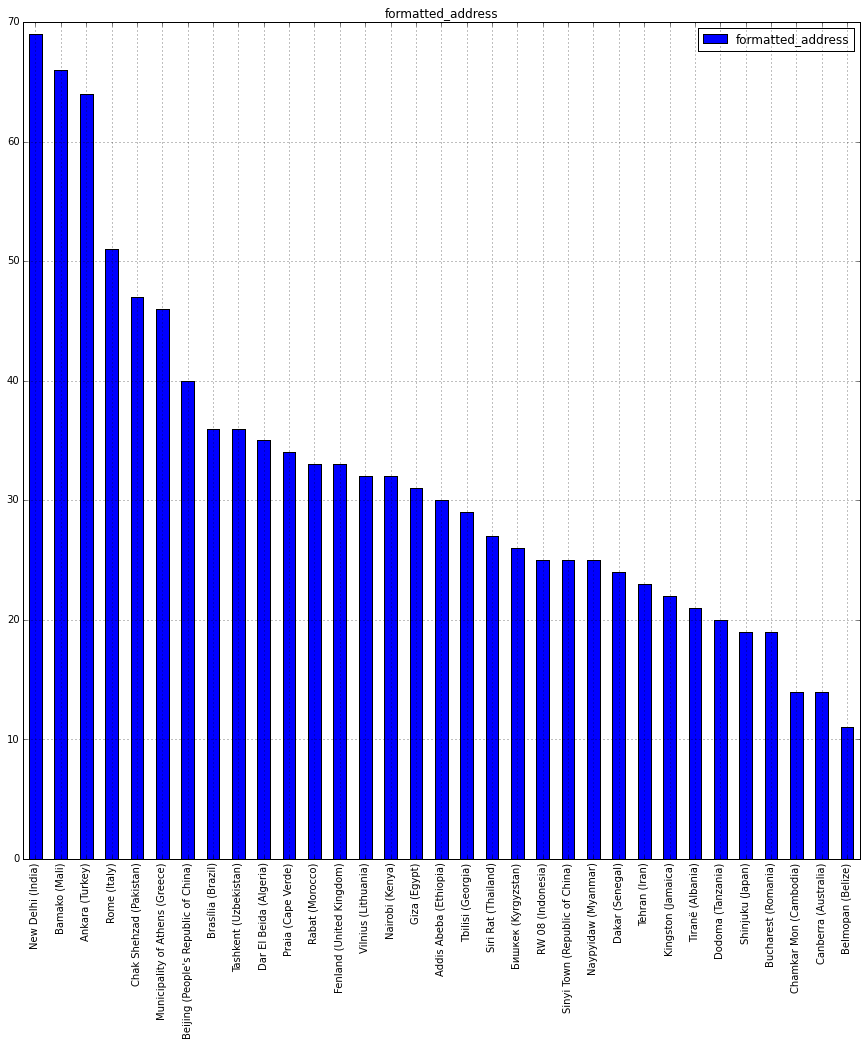

In [5]:
df2 = pd.DataFrame(result['formatted_address']) 
df2.apply(pd.value_counts).plot(kind='bar', subplots=True,figsize=(15,15));

## Feature Engineering

###PCA

Dataset has alreay been normalized

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
Xs = result.iloc[:,:68]
pca.fit(Xs)



PCA(copy=True, n_components=None, whiten=False)

In [19]:
table(Xs.head())

####Plot of variances associated with PCs

[u'pc0', u'pc1', u'pc2', u'pc3', u'pc4', u'pc5', u'pc6', u'pc7', u'pc8', u'pc9', u'pc10', u'pc11', u'pc12', u'pc13', u'pc14', u'pc15', u'pc16', u'pc17', u'pc18', u'pc19', u'pc20', u'pc21', u'pc22', u'pc23', u'pc24', u'pc25', u'pc26', u'pc27', u'pc28', u'pc29', u'pc30', u'pc31', u'pc32', u'pc33', u'pc34', u'pc35', u'pc36', u'pc37', u'pc38', u'pc39', u'pc40', u'pc41', u'pc42', u'pc43', u'pc44', u'pc45', u'pc46', u'pc47', u'pc48', u'pc49', u'pc50', u'pc51', u'pc52', u'pc53', u'pc54', u'pc55', u'pc56', u'pc57', u'pc58', u'pc59', u'pc60', u'pc61', u'pc62', u'pc63', u'pc64', u'pc65', u'pc66', u'pc67']


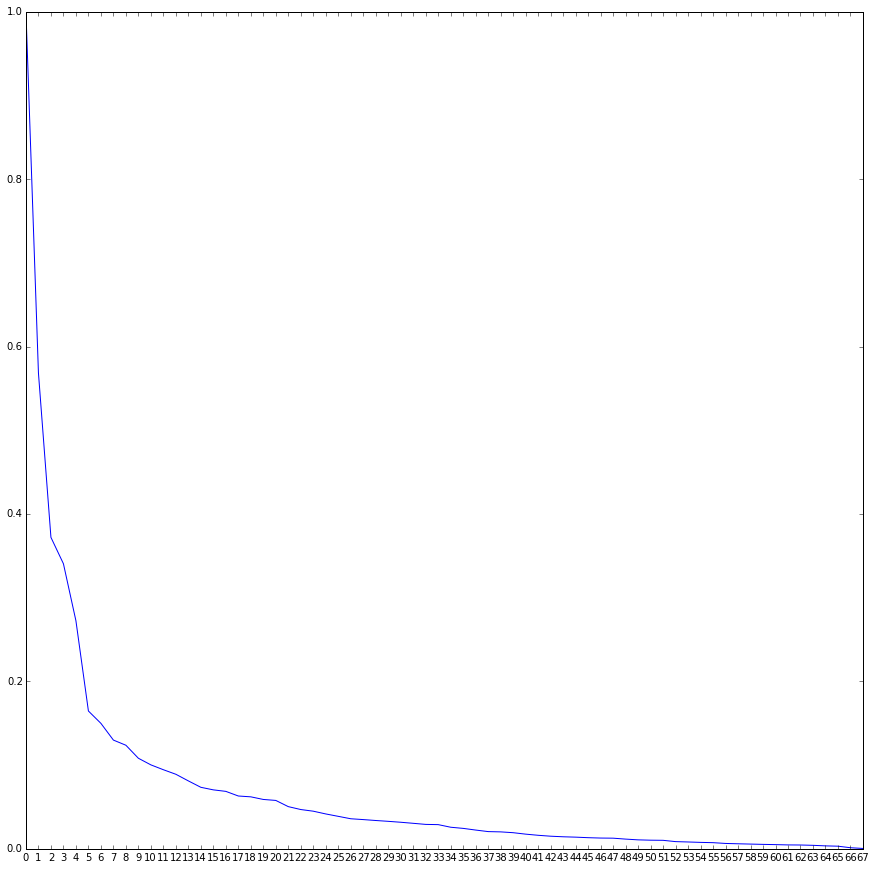

In [20]:
labels=['pc' + str(pc) for pc in range (0,68)]
var = pca.explained_variance_ratio_ / max(pca.explained_variance_ratio_)
plt.figure(figsize=(15,15))
plt.xticks(np.arange(0, 70, 1))
plt.plot(var)

print labels

This plot returns a plot of the variances associated with the PCs. We can see that the first 5 PCs (from pc0 to pc4) are enough to explain most of the variance in the data set

In [21]:
df_pca = pd.DataFrame(pca.transform(Xs),columns=labels)
table(df_pca.head())

Let's try to plot each of these PCs with against each other:

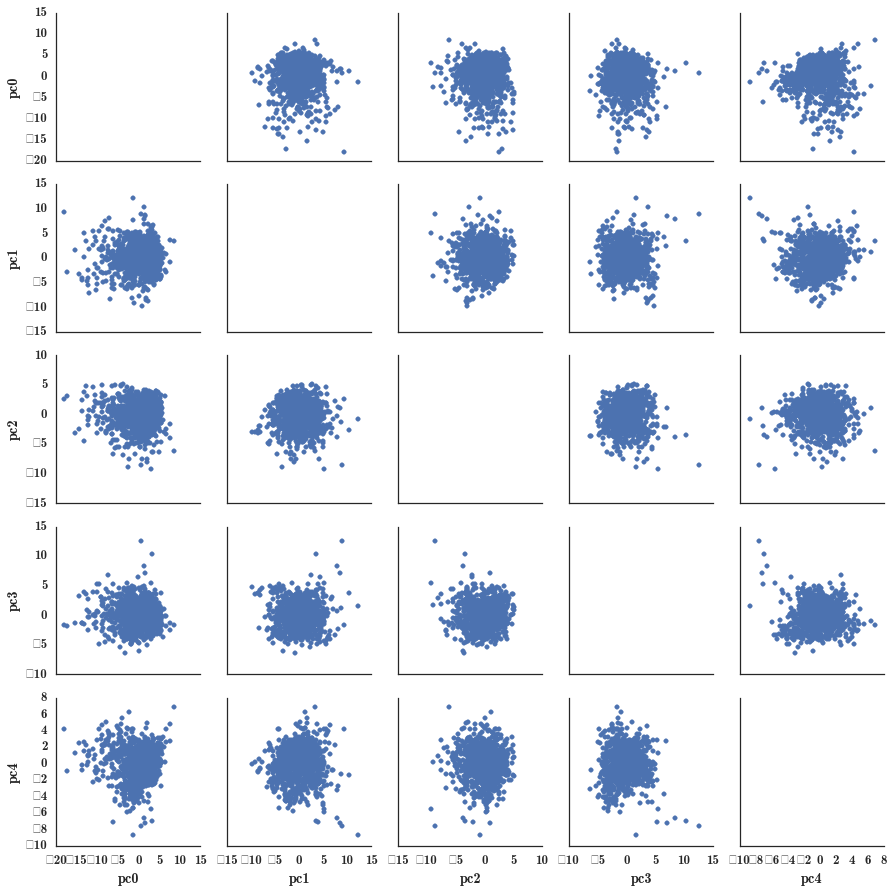

In [46]:
g = sns.PairGrid(df_pca.iloc[:,:5],size=2.5)
g.map_offdiag(plt.scatter)

In [50]:
print "If we had to explain what those 5 PCs represents compared to our initial 68 features, that would be how:"

for component in pca.components_[:5]:
    print " + ".join("%.3f x %s" % (value,"feature_"+str(name))
                    for value,name in zip(component,Xs.columns))
    print "\n"

Meaning of the 5 components:
-0.043 x feature_0 + -0.063 x feature_1 + 0.026 x feature_2 + 0.030 x feature_3 + 0.017 x feature_4 + 0.065 x feature_5 + 0.082 x feature_6 + 0.069 x feature_7 + 0.098 x feature_8 + 0.093 x feature_9 + 0.084 x feature_10 + 0.058 x feature_11 + 0.031 x feature_12 + 0.025 x feature_13 + -0.006 x feature_14 + 0.010 x feature_15 + -0.035 x feature_16 + -0.002 x feature_17 + -0.004 x feature_18 + 0.061 x feature_19 + 0.012 x feature_20 + -0.026 x feature_21 + -0.009 x feature_22 + -0.049 x feature_23 + -0.077 x feature_24 + -0.117 x feature_25 + -0.129 x feature_26 + -0.145 x feature_27 + -0.154 x feature_28 + -0.145 x feature_29 + -0.167 x feature_30 + -0.179 x feature_31 + -0.183 x feature_32 + -0.155 x feature_33 + -0.021 x feature_34 + -0.008 x feature_35 + 0.007 x feature_36 + -0.025 x feature_37 + -0.059 x feature_38 + -0.067 x feature_39 + -0.101 x feature_40 + -0.120 x feature_41 + -0.155 x feature_42 + -0.182 x feature_43 + -0.186 x feature_44 + -0.193 

###Circle of correlation

     pc0   pc1   pc2   pc3   pc4
0   0.16 -0.13  0.16 -0.66  0.58
1   0.24 -0.16  0.32 -0.68  0.43
2  -0.10 -0.48  0.32 -0.25  0.05
3  -0.11 -0.55 -0.30  0.25 -0.23
4  -0.06  0.16 -0.34 -0.30  0.23
5  -0.24  0.01  0.04  0.64 -0.39
6  -0.31 -0.36  0.02  0.18 -0.20
7  -0.25 -0.14 -0.05  0.25 -0.14
8  -0.36 -0.41  0.02 -0.08 -0.31
9  -0.34 -0.24  0.06  0.07 -0.08
10 -0.30 -0.26  0.11  0.12 -0.13
11 -0.21 -0.18 -0.01 -0.16 -0.20
12 -0.11 -0.30  0.11  0.18  0.03
13 -0.09 -0.10  0.04  0.01 -0.02
14  0.02 -0.12  0.18  0.11  0.20
15 -0.04 -0.12  0.10 -0.02 -0.03
16  0.13 -0.01  0.10  0.08  0.25
17  0.01 -0.60  0.08 -0.44  0.47
18  0.01 -0.65  0.14 -0.47  0.38
19 -0.23 -0.61  0.09 -0.01 -0.11
20 -0.05 -0.50 -0.09  0.16 -0.40
21  0.10 -0.77  0.04  0.06 -0.26
22  0.04 -0.74 -0.11  0.23 -0.16
23  0.18 -0.71 -0.14  0.23  0.16
24  0.29 -0.58 -0.23  0.37  0.39
25  0.43 -0.55 -0.32  0.32  0.31
26  0.48 -0.54 -0.40  0.14  0.11
27  0.53 -0.51 -0.42  0.12  0.11
28  0.57 -0.41 -0.47 -0.02  0.01
29  0.54 -

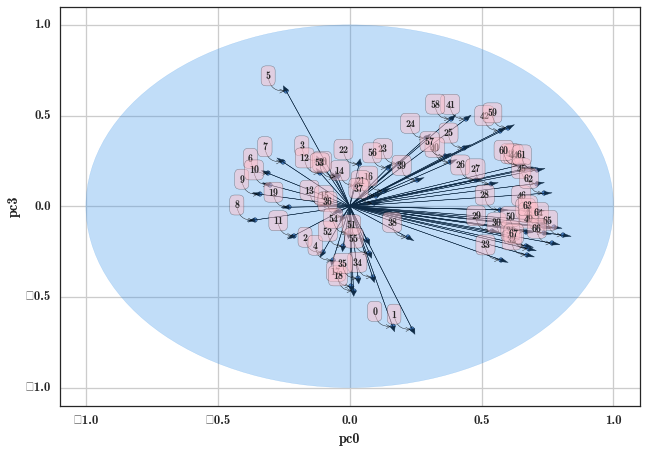

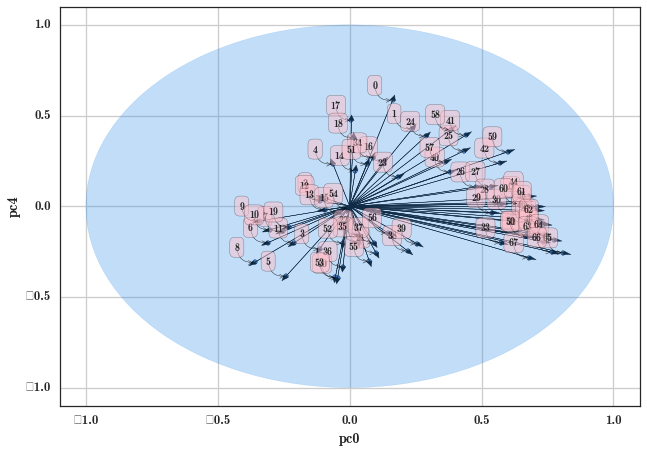

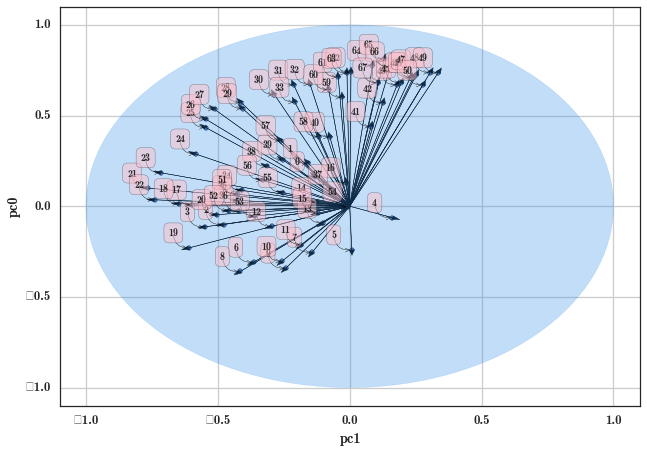

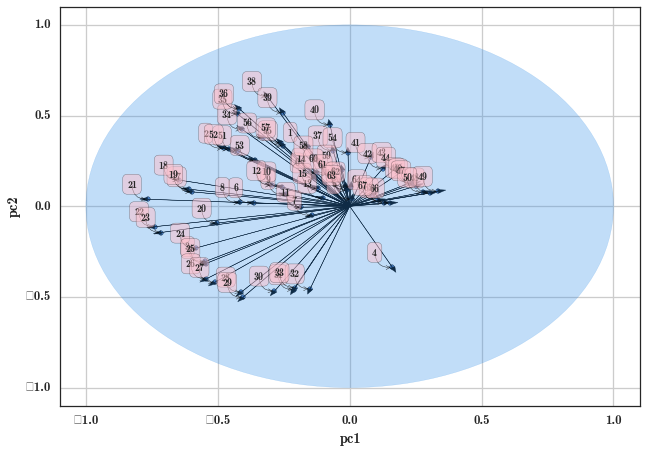

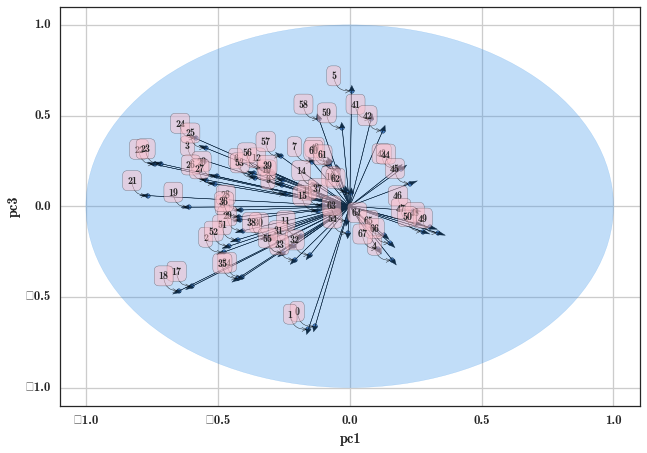

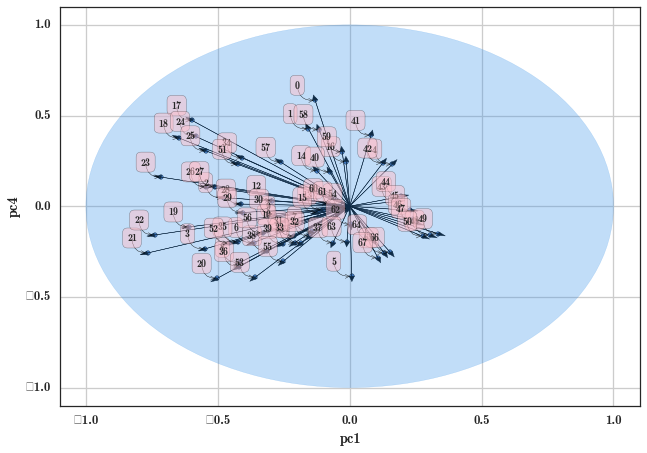

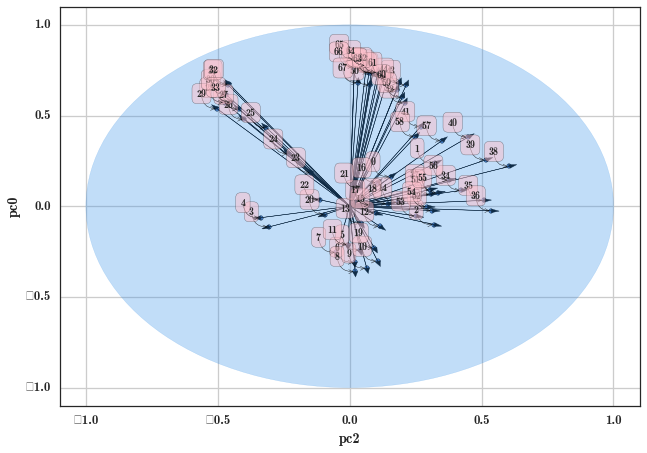

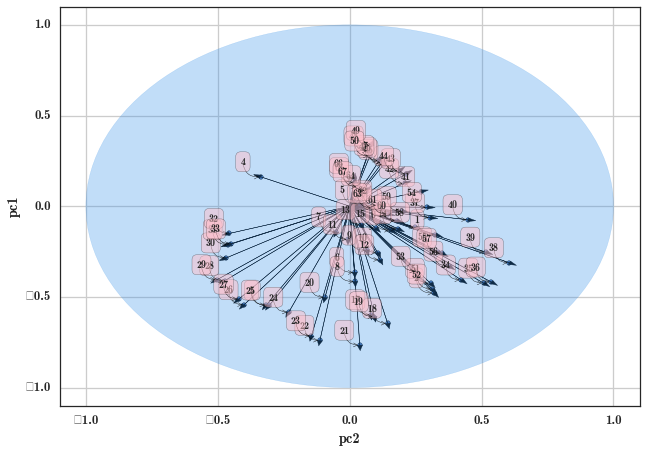

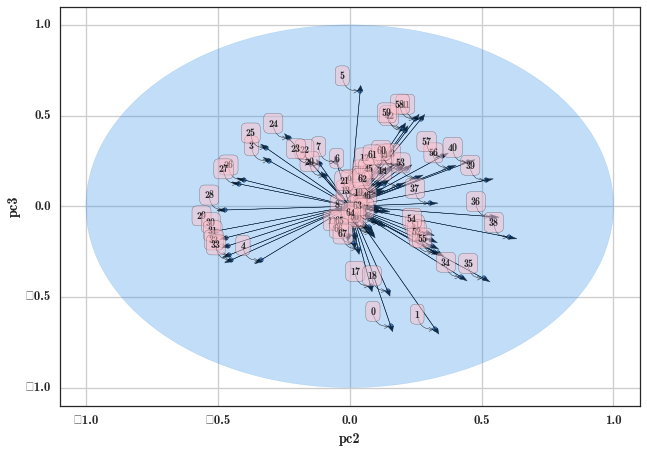

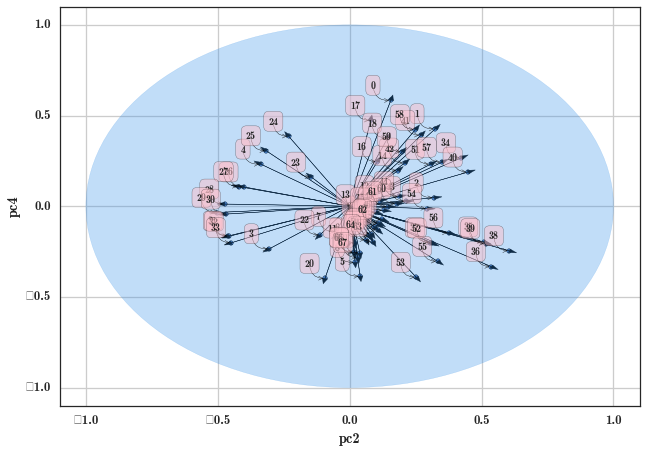

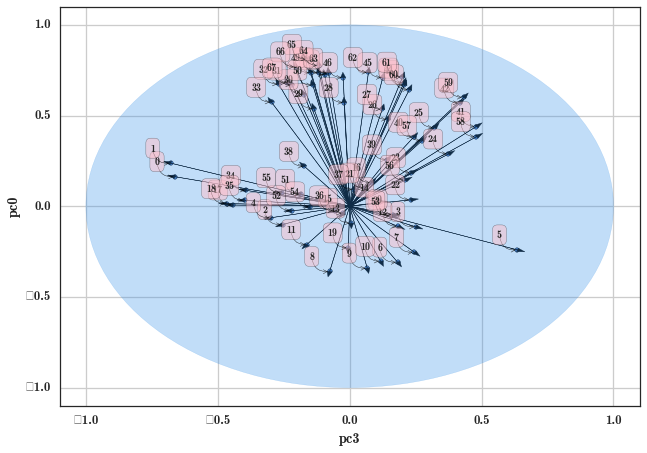

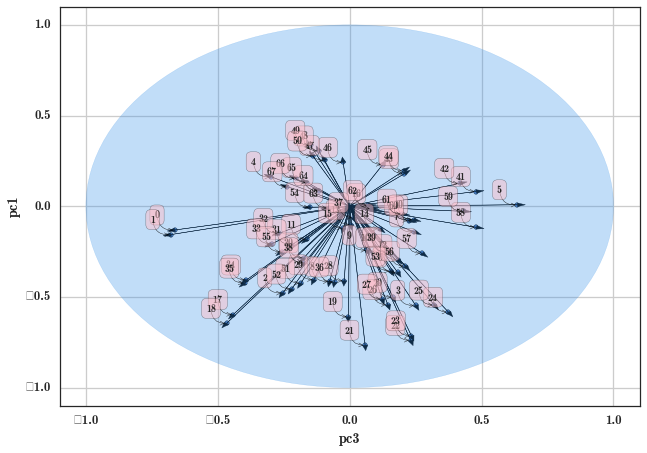

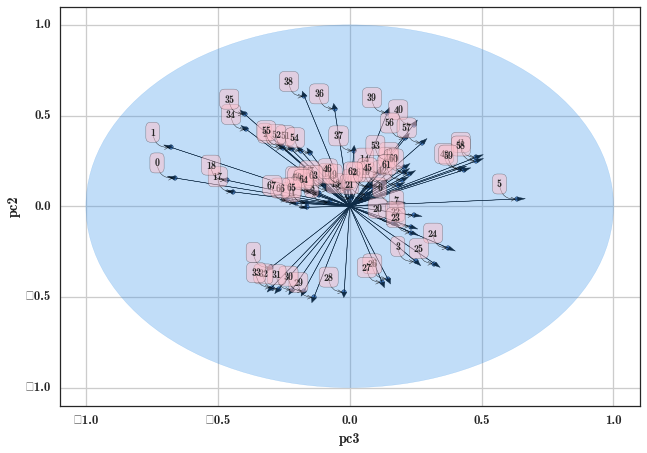

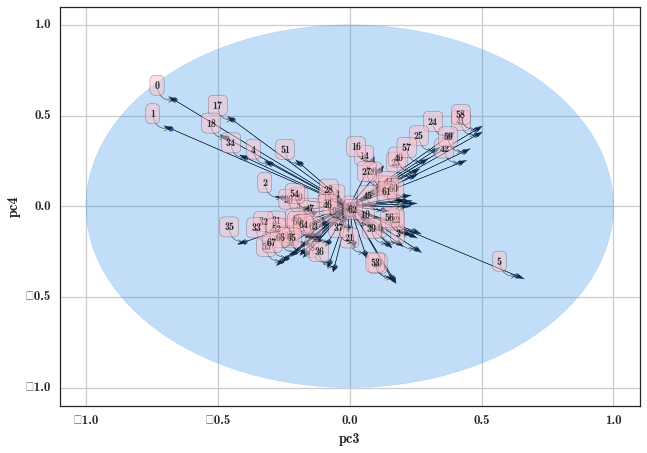

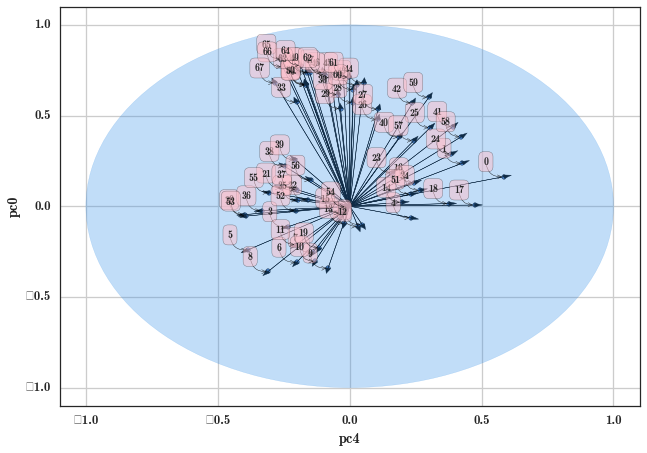

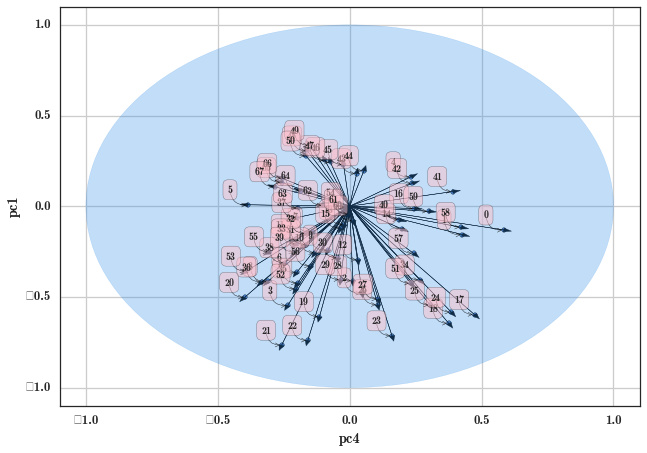

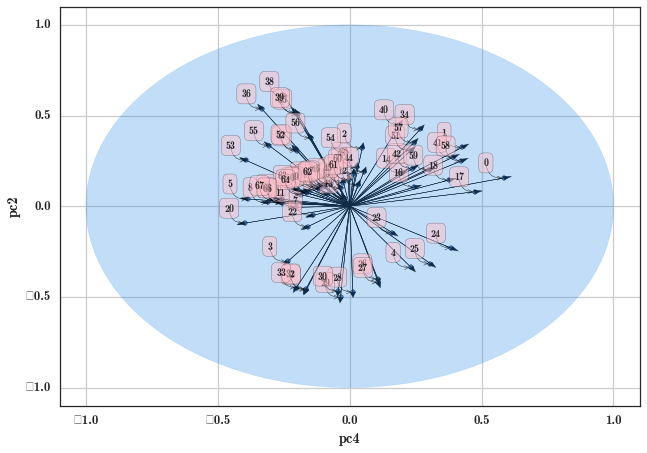

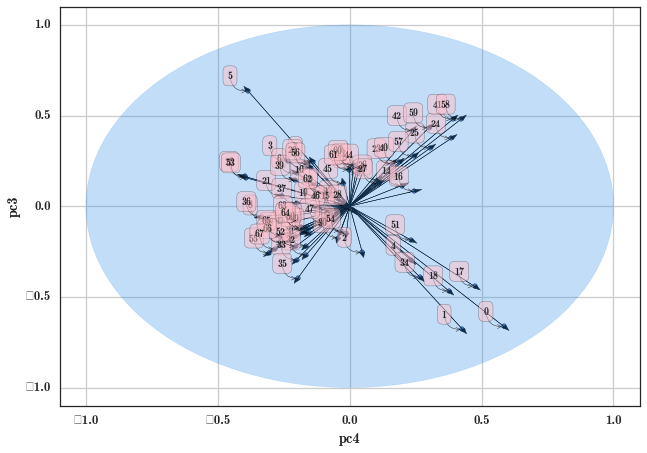

In [136]:
pcs = ['pc0','pc1','pc2','pc3','pc4']

corrs = [[np.corrcoef(df_pca[pc], Xs[feat])[0][1] * -1 for feat in Xs.columns] for pc in pcs]    
dfs = pd.DataFrame(corrs, columns=Xs.columns)
dfs.index = pcs
print dfs.T
for pcA in pcs:
    for pcB in pcs:
        if pcA != pcB:
            dfs.T.plot(kind='scatter',x=pcA,y=pcB)
            for label, x, y in zip(Xs.columns, dfs.T[pcA], dfs.T[pcB]):
                plt.annotate(
                    label, 
                    xy = (x, y), xytext = (-20, 10),
                    textcoords = 'offset points', ha = 'left', va = 'bottom',
                    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'pink', alpha = 0.5),
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.5'))
                plt.arrow( 0, 0, x, y, fc="k", ec="k")

            circle1=plt.Circle((0,0),1,color='#3490e9', alpha=0.3)
            fig = plt.gcf()
            fig.gca().add_artist(circle1)
            x1,x2,y1,y2 = plt.axis()
            plt.axis((-1.1,1.1,-1.1,1.1));

##LDA after PCA

In [28]:
from sklearn.lda import LDA

#let's re-use our 5 first PCs from the PCA output dataset

lda = LDA(solver='eigen')
#take first 6 PCAs
Xs = df_pca.iloc[:,:5]
#output labels: unique location mapped to int from 0 to 32
lda.fit(Xs, result['num_addr'])

LDA(n_components=None, priors=None, shrinkage=None, solver=u'eigen',
  store_covariance=False, tol=0.0001)

In [24]:


print lda.score(Xs, result['num_addr'])


0.245514636449


In [29]:
df_lda = pd.DataFrame(lda.transform(Xs))
df_lda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 5 columns):
0    1059 non-null float64
1    1059 non-null float64
2    1059 non-null float64
3    1059 non-null float64
4    1059 non-null float64
dtypes: float64(5)
memory usage: 49.6 KB


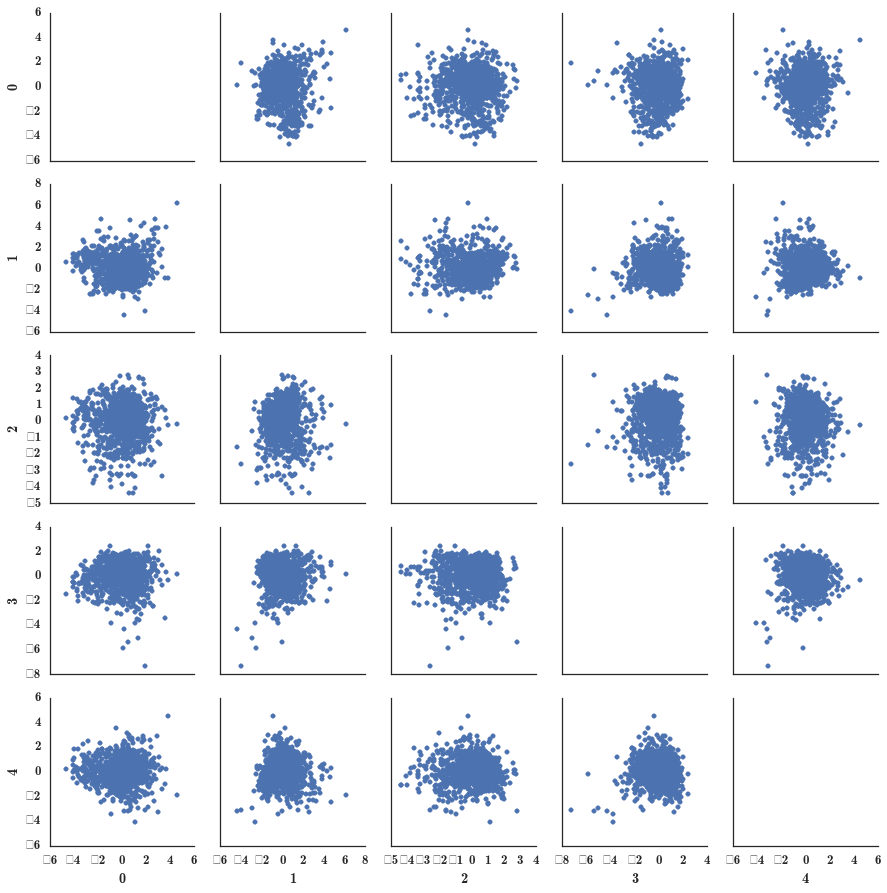

In [140]:
g = sns.PairGrid(df_lda.iloc[:,:5],size=2.5)
g.map_offdiag(plt.scatter)

##Classification: Random Forests

Let's use the LDA dataset to perform random forest classification 

In [31]:
from IPython.display import display as dump

from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# use resulting dataset from LDA as Xs
X1 = df_lda
#use numbers (corresponding to specific locations) as Y
y1 = result['num_addr']




## DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
       random_state=0)
scores = cross_val_score(clf, X1, y1)
print "DecisionTreeClassifier:", scores.mean()

## RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, max_depth=None,
     min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X1, y1)
print "RandomForestClassifier:", scores

## ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=30, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X1, y1)
print "ExtraTreesClassifier:  ", scores

DecisionTreeClassifier: 0.156674054206
RandomForestClassifier: [ 0.17307692  0.22096317  0.19005848]
ExtraTreesClassifier:   [ 0.18406593  0.21813031  0.20760234]


###Classification using pairs of features

In [32]:
import numpy as np


from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30

RANDOM_SEED = 13  # fix the seed on each iteration



models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]





for pair in ([0, 1], [0, 2], [0, 3],[0, 4],[1, 2],[1, 3],[1, 4],[2, 3],[2, 4],[3, 4]):
    for model in models:
        # We only take the two corresponding features
        X = X1.iloc[:,pair]
        y = y1

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X.ix[idx.tolist()]
        y = y.ix[idx.tolist()]

        # Standardize
        #mean = X.mean(axis=0)
        #std = X.std(axis=0)
        #X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + " with features", pair, "has a score of", scores )

           

(u'DecisionTree with features', [0, 1], u'has a score of', 1.0)
(u'RandomForest with 30 estimators with features', [0, 1], u'has a score of', 1.0)
(u'ExtraTrees with 30 estimators with features', [0, 1], u'has a score of', 1.0)
(u'AdaBoost with 30 estimators with features', [0, 1], u'has a score of', 0.13031161473087818)
(u'DecisionTree with features', [0, 2], u'has a score of', 1.0)
(u'RandomForest with 30 estimators with features', [0, 2], u'has a score of', 1.0)
(u'ExtraTrees with 30 estimators with features', [0, 2], u'has a score of', 1.0)
(u'AdaBoost with 30 estimators with features', [0, 2], u'has a score of', 0.13692162417374881)
(u'DecisionTree with features', [0, 3], u'has a score of', 1.0)
(u'RandomForest with 30 estimators with features', [0, 3], u'has a score of', 1.0)
(u'ExtraTrees with 30 estimators with features', [0, 3], u'has a score of', 1.0)
(u'AdaBoost with 30 estimators with features', [0, 3], u'has a score of', 0.13975448536355051)
(u'DecisionTree with features',

##Out of sample data

We are going to build our own out of sample dataset using MARSYAS.

MARSYAS works with uncompressed audio files, so to build an out-of-sample dataset I had to convert some mp3 to WAV files using avconv.

- To install avconv, run:  
`apt-get install libav-tools`  


- To convert an MP3 to WAV:  
`avconv -c mp3 -i my_song.mp3 my_song.wav`  


- Create a collection of the audio files you want to process through MARSYAS assuming /home/vagrant/wav is the folder containing your audio files:  
`mkcollection -c mycoll.mf /home/vagrant/wav`  



- Extract 68 timbral features  (Time Zero Crossings, Spectral Centroid, Spectral Flux, Spectral Rolloff qnd MFCC) using default MARSYAS settings:  
` bextract -sv -mfcc -zcrs -ctd -rlf -flx mycoll.mf -w output.arff `  


output.arff contains the comma-separated extracted features.


To check whether our model works, we need to get audio files from locations known by the model (among the 33 locations the model have been trained on).